## Abstract:

# Data

### Import Libraries

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#Enforce copy on write
pd.options.mode.copy_on_write = True

### Read In Data

In [27]:
#Read in our training and test data here, although we will only be looking at our training data
cwd = Path().cwd()
project_folder = cwd.parent
training_data = Path('data/train_data.csv')
testing_data = Path('data/test_data_competition.csv')
file1 = project_folder / training_data
file2 = project_folder / testing_data

if not file1.exists() or not file2.exists():
    raise FileNotFoundError("Data files not found. Please ensure the data files are in the correct directory.")

train_df = pd.read_csv(file1)
test_df = pd.read_csv(file2)

print(train_df.head())
print(test_df.head())

                                           Person ID  Gender  Age  \
0  d29d53701d3c859e29e1b90028eec1ca8e2f29439198b6...    Male   62   
1  71a1c003a2b855d85582c8f6c7648c49d3fe836408a7e1...  Female   35   
2  86e50149658661312a9e0b35558d84f6c6d3da797f552a...  Female   50   
3  093434a3ee9e0a010bb2c2aae06c2614dd24894062a1ca...    Male   38   
4  e3d6c4d4599e00882384ca981ee287ed961fa5f3828e2a...  Female   34   

      Occupation  Sleep Duration (hours)  Quality of Sleep (scale: 1-10)  \
0        Student                5.802690                        9.684249   
1   Manual Labor                7.928079                        4.589872   
2  Office Worker                4.425595                        6.809697   
3  Office Worker                9.031985                        4.682931   
4        Student                8.719110                        6.729776   

   Physical Activity Level (minutes/day)  Stress Level (scale: 1-10)  \
0                              26.361925                

### Data Analysis

##### Face-Value Analysis and Remarks

In [4]:
print(train_df.info())
train_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              100 non-null    object 
 1   Gender                                 100 non-null    object 
 2   Age                                    100 non-null    int64  
 3   Occupation                             100 non-null    object 
 4   Sleep Duration (hours)                 100 non-null    float64
 5   Quality of Sleep (scale: 1-10)         100 non-null    float64
 6   Physical Activity Level (minutes/day)  100 non-null    float64
 7   Stress Level (scale: 1-10)             100 non-null    float64
 8   BMI Category                           100 non-null    object 
 9   Blood Pressure (systolic/diastolic)    100 non-null    object 
 10  Heart Rate (bpm)                       100 non-null    float64
 11  Daily S

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
count,100,100,100.000000,100,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000,100
unique,100,2,NaN,4,NaN,NaN,NaN,NaN,4,88,NaN,NaN,3
top,d29d53701d3c859e29e1b90028eec1ca8e2f29439198b6...,Female,NaN,Student,NaN,NaN,NaN,NaN,Overweight,111/60,NaN,NaN,No Disorder
freq,1,53,NaN,28,NaN,NaN,NaN,NaN,28,4,NaN,NaN,70
mean,NaN,NaN,41.240000,NaN,8.038935,6.010304,67.295728,5.750546,NaN,NaN,75.483163,11112.861549,NaN
std,NaN,NaN,14.575557,NaN,2.143322,2.004628,34.881281,3.079152,NaN,NaN,15.091822,5123.171235,NaN
min,NaN,NaN,18.000000,NaN,4.099805,0.952464,9.584213,0.952482,NaN,NaN,49.291095,2066.202591,NaN
25%,NaN,NaN,29.000000,NaN,6.247339,4.694585,34.332596,3.064048,NaN,NaN,62.206186,6313.406739,NaN
50%,NaN,NaN,41.000000,NaN,8.392381,6.069093,68.774414,5.743814,NaN,NaN,75.859747,11614.922422,NaN
75%,NaN,NaN,50.000000,NaN,9.640982,7.086423,98.310040,8.962948,NaN,NaN,88.795969,15044.992315,NaN


In [5]:
#Find Unique Values for each column
print(train_df['Occupation'].unique())
print(train_df['BMI Category'].unique())
print(train_df['Sleep Disorder'].unique())

##After running we can see that the jobs of the people working are under 4 categories, Student, Manual Labor, Office Worker and Retired.
##With BMI categories we can look at Overweight, Obese, Normal, Underweight
##Finally, we see that the disorders that we can find are none, insomnia or sleep apnea.

['Student' 'Manual Labor' 'Office Worker' 'Retired']
['Overweight' 'Obese' 'Normal' 'Underweight']
['No Disorder' 'Insomnia' 'Sleep Apnea']


In [7]:
#Look at the info, separated by Sleep Disorder
no_dis = train_df[train_df['Sleep Disorder'] == 'No Disorder']
insomnia = train_df[train_df['Sleep Disorder'] == 'Insomnia']
apnea = train_df[train_df['Sleep Disorder'] == 'Sleep Apnea']

print(no_dis.info())
no_dis.describe(include='all')

#On average, it seems that people with no sleep disorders can expect to have the following traits:
# ~Roughly 7.9 hours or 8 hours of sleep per night
# With ~ 5.8/10 quality of sleep
# Partake in just over an hour of physical activity a day
# Experience moderate stress, daily, with a ranking of ~5.8/10
# Have an average bpm of 76
# And take 10,000 steps a day -- Although the minimum steps a day an individual w/o a sleep disorder seems to be ~2k steps

#This is not the numbers you'd expect to see, so let's look at age and occupation to see how these may factor into these numbers.

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 97
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              70 non-null     object 
 1   Gender                                 70 non-null     object 
 2   Age                                    70 non-null     int64  
 3   Occupation                             70 non-null     object 
 4   Sleep Duration (hours)                 70 non-null     float64
 5   Quality of Sleep (scale: 1-10)         70 non-null     float64
 6   Physical Activity Level (minutes/day)  70 non-null     float64
 7   Stress Level (scale: 1-10)             70 non-null     float64
 8   BMI Category                           70 non-null     object 
 9   Blood Pressure (systolic/diastolic)    70 non-null     object 
 10  Heart Rate (bpm)                       70 non-null     float64
 11  Daily Steps  

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
count,70,70,70.000000,70,70.000000,70.000000,70.000000,70.000000,70,70,70.000000,70.000000,70
unique,70,2,NaN,4,NaN,NaN,NaN,NaN,4,66,NaN,NaN,1
top,d29d53701d3c859e29e1b90028eec1ca8e2f29439198b6...,Male,NaN,Student,NaN,NaN,NaN,NaN,Overweight,112/60,NaN,NaN,No Disorder
freq,1,36,NaN,22,NaN,NaN,NaN,NaN,24,2,NaN,NaN,70
mean,NaN,NaN,41.171429,NaN,7.992489,5.846040,66.423630,5.876609,NaN,NaN,76.993738,10759.976061,NaN
std,NaN,NaN,14.248286,NaN,2.026129,2.109366,35.690856,3.228989,NaN,NaN,15.523978,5258.277948,NaN
min,NaN,NaN,18.000000,NaN,4.099805,0.952464,9.584213,0.952482,NaN,NaN,49.291095,2066.202591,NaN
25%,NaN,NaN,29.000000,NaN,6.445810,4.437603,32.343712,3.010532,NaN,NaN,63.559430,6110.149535,NaN
50%,NaN,NaN,39.500000,NaN,8.207361,5.859555,67.226149,5.964977,NaN,NaN,77.869451,11028.510209,NaN
75%,NaN,NaN,50.000000,NaN,9.526284,7.152107,96.690751,9.196613,NaN,NaN,90.754893,14917.918204,NaN


In [8]:
print(insomnia.info())
insomnia.describe(include='all')

#On average, it seems that people with insomnia can expect to have the following traits:
# ~Roughly 7.9 hours or 8 hours of sleep per night
# With ~ 6.4/10 quality of sleep
# Partake in just over an hour of physical activity a day
# Experience moderate stress, daily, with a ranking of ~5/10
# Have an average bpm of ~70.5
# And take 12,000 steps a day -- Although the minimum steps a day an individual w/o a sleep disorder seems to be ~3.2k steps

#This seems to tell us that there are either heavvy outliers, the much smaller sample size plays a large difference, or that a seemingly happier and more active lifestyle
#will bring you insomnia

#Let's break it down by occupation and age to get a better glimpse.

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1 to 99
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              23 non-null     object 
 1   Gender                                 23 non-null     object 
 2   Age                                    23 non-null     int64  
 3   Occupation                             23 non-null     object 
 4   Sleep Duration (hours)                 23 non-null     float64
 5   Quality of Sleep (scale: 1-10)         23 non-null     float64
 6   Physical Activity Level (minutes/day)  23 non-null     float64
 7   Stress Level (scale: 1-10)             23 non-null     float64
 8   BMI Category                           23 non-null     object 
 9   Blood Pressure (systolic/diastolic)    23 non-null     object 
 10  Heart Rate (bpm)                       23 non-null     float64
 11  Daily Steps  

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
count,23,23,23.000000,23,23.000000,23.000000,23.000000,23.000000,23,23,23.000000,23.000000,23
unique,23,2,NaN,4,NaN,NaN,NaN,NaN,4,22,NaN,NaN,1
top,71a1c003a2b855d85582c8f6c7648c49d3fe836408a7e1...,Female,NaN,Office Worker,NaN,NaN,NaN,NaN,Underweight,117/69,NaN,NaN,Insomnia
freq,1,14,NaN,9,NaN,NaN,NaN,NaN,8,2,NaN,NaN,23
mean,NaN,NaN,41.391304,NaN,7.982956,6.442934,70.058244,5.079108,NaN,NaN,70.499046,12292.983031,NaN
std,NaN,NaN,13.107039,NaN,2.280128,1.844079,36.607040,2.685783,NaN,NaN,14.062677,4888.651365,NaN
min,NaN,NaN,18.000000,NaN,4.500696,2.902434,10.892779,1.000871,NaN,NaN,51.191902,3186.611576,NaN
25%,NaN,NaN,34.500000,NaN,6.017872,5.307052,41.304254,3.062190,NaN,NaN,58.199750,10090.489269,NaN
50%,NaN,NaN,43.000000,NaN,7.928079,6.272007,73.492044,4.798688,NaN,NaN,72.523150,12461.582036,NaN
75%,NaN,NaN,50.500000,NaN,9.625802,7.402694,104.648351,7.611177,NaN,NaN,79.887190,15747.894822,NaN


In [9]:
print(apnea.info())
apnea.describe(include='all')

#On average, it seems that people with Sleep Apnea can expect to have the following traits:
# ~Roughly 8.6 hours of sleep per night
# With ~ 6.23/10 quality of sleep
# Partake in just over an hour of physical activity a day
# Experience moderate stress, daily, with a ranking of ~6.7/10
# Have an average bpm of ~76.7
# And take 10,000 steps a day -- Although the minimum steps a day an individual w/o a sleep disorder seems to be ~3.2k steps

#The much smaller sample size might play a large difference as to why the hours of sleep may seem high, but the quality of sleep
# and level of stress seems to be reasonable for those who may have a sleeping disorder. We'll take a look at possible outliers.

#Let's also break it down by occupation and age to get a better glimpse.

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 16 to 98
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              7 non-null      object 
 1   Gender                                 7 non-null      object 
 2   Age                                    7 non-null      int64  
 3   Occupation                             7 non-null      object 
 4   Sleep Duration (hours)                 7 non-null      float64
 5   Quality of Sleep (scale: 1-10)         7 non-null      float64
 6   Physical Activity Level (minutes/day)  7 non-null      float64
 7   Stress Level (scale: 1-10)             7 non-null      float64
 8   BMI Category                           7 non-null      object 
 9   Blood Pressure (systolic/diastolic)    7 non-null      object 
 10  Heart Rate (bpm)                       7 non-null      float64
 11  Daily Steps  

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
count,7,7,7.000000,7,7.000000,7.000000,7.000000,7.000000,7,7,7.000000,7.000000,7
unique,7,2,NaN,4,NaN,NaN,NaN,NaN,3,7,NaN,NaN,1
top,efd96aedf377e20afd95285a7c751a864260bd6a149656...,Female,NaN,Student,NaN,NaN,NaN,NaN,Underweight,111/60,NaN,NaN,Sleep Apnea
freq,1,5,NaN,2,NaN,NaN,NaN,NaN,3,1,NaN,NaN,7
mean,NaN,NaN,41.428571,NaN,8.687322,6.231449,66.939864,6.696070,NaN,NaN,76.753787,10764.174416,NaN
std,NaN,NaN,23.251216,NaN,2.999633,1.256636,21.785295,2.670252,NaN,NaN,11.739466,4532.309070,NaN
min,NaN,NaN,22.000000,NaN,4.361516,4.367647,34.339509,2.852991,NaN,NaN,62.200633,4537.845706,NaN
25%,NaN,NaN,26.500000,NaN,6.859269,5.521207,51.029624,5.064725,NaN,NaN,67.401180,7852.523976,NaN
50%,NaN,NaN,36.000000,NaN,10.367127,6.339010,75.178711,6.729262,NaN,NaN,79.118284,9843.407370,NaN
75%,NaN,NaN,44.500000,NaN,10.726551,6.850074,84.248268,8.424662,NaN,NaN,83.213997,14234.298652,NaN


##### Visualization

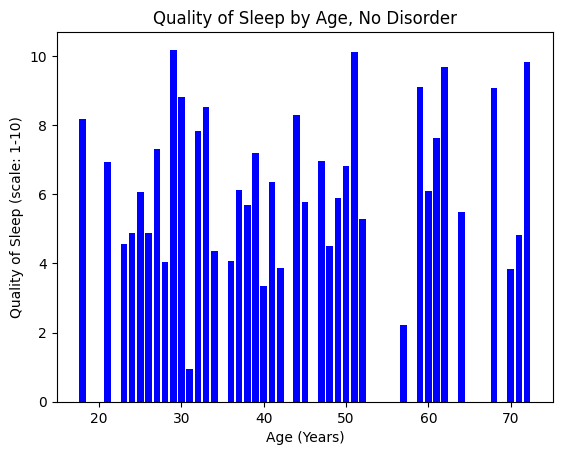

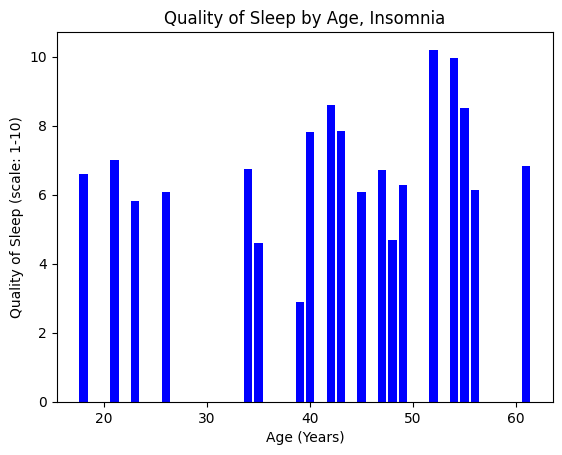

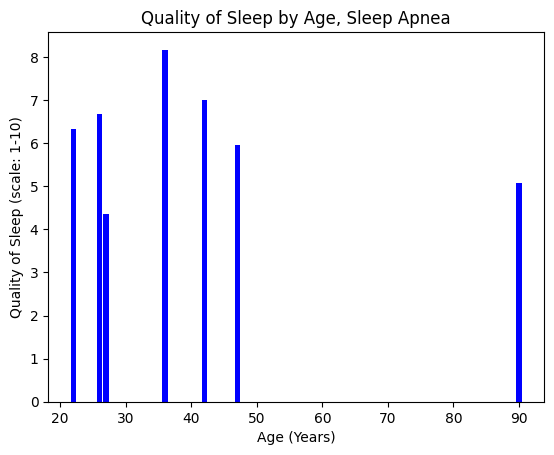

In [20]:
#Let's visualize what this data looks like currently to make more future changes!
plt.figure
plt.bar(no_dis['Age'], no_dis['Quality of Sleep (scale: 1-10)'], color='blue')
plt.title("Quality of Sleep by Age, No Disorder")
plt.xlabel("Age (Years)")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.show()

#Let's visualize for those with insomnia
plt.figure
plt.bar(insomnia['Age'], insomnia['Quality of Sleep (scale: 1-10)'], color='blue')
plt.title("Quality of Sleep by Age, Insomnia")
plt.xlabel("Age (Years)")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.show()


#Let's visualize for those with sleep apnea
plt.figure
plt.bar(apnea['Age'], apnea['Quality of Sleep (scale: 1-10)'], color='blue')
plt.title("Quality of Sleep by Age, Sleep Apnea")
plt.xlabel("Age (Years)")
plt.ylabel("Quality of Sleep (scale: 1-10)")
plt.show()

#We can see that through all data sets, there is only 1 person over the age of 73/74. There are a few people within the 68-70 range. Let's visualize some more data by their sleep disorder, age group,  and daily steps to see how that affects quality of sleep.


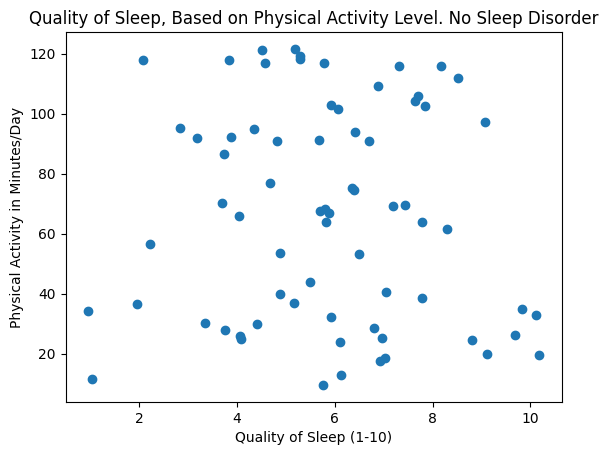

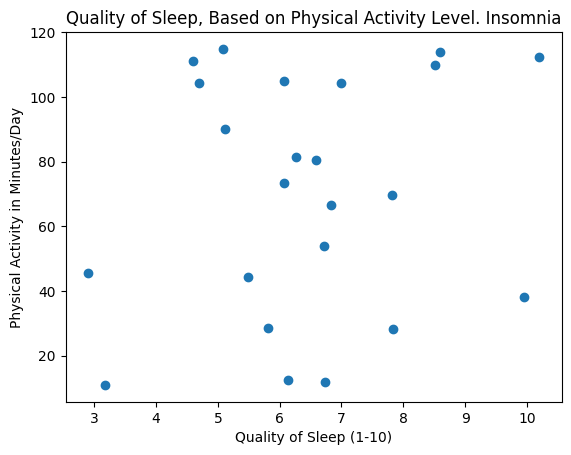

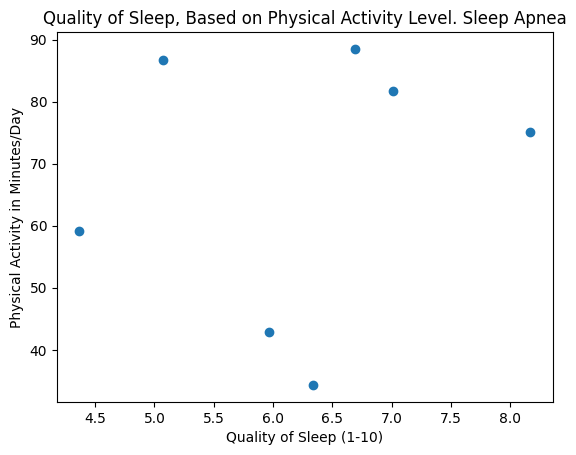

In [40]:
# #Let's separate by age groups to look at the data
# no_dis_under25 = no_dis[ no_dis['Age'] <= 25 ]
# no_dis_under35 = no_dis[ (no_dis['Age'] <= 35) & (no_dis['Age'] > 25) ]
# no_dis_under45 = no_dis[ (no_dis['Age'] <= 45) & (no_dis['Age'] > 35) ]
# no_dis_over45  = no_dis[ no_dis['Age'] > 45 ]

# plt.figure()
# plt.title("Quality of Sleep, Based on Physical Activity Level. No Sleep Disorder, Under 25 Years Old")
# plt.scatter(no_dis_under25['Quality of Sleep (scale: 1-10)'], no_dis_under25['Physical Activity Level (minutes/day)'])
# plt.xlabel("Quality of Sleep (1-10)")
# plt.ylabel("Physical Activity in Minutes/Day")
# plt.show()

# plt.figure()
# plt.title("Quality of Sleep, Based on Physical Activity Level. No Sleep Disorder, Under 35 Years Old")
# plt.scatter(no_dis_under35['Quality of Sleep (scale: 1-10)'], no_dis_under35['Physical Activity Level (minutes/day)'])
# plt.xlabel("Quality of Sleep (1-10)")
# plt.ylabel("Physical Activity in Minutes/Day")
# plt.show()

# plt.figure()
# plt.title("Quality of Sleep, Based on Physical Activity Level. No Sleep Disorder, Under 45 Years Old")
# plt.scatter(no_dis_under45['Quality of Sleep (scale: 1-10)'], no_dis_under45['Physical Activity Level (minutes/day)'])
# plt.xlabel("Quality of Sleep (1-10)")
# plt.ylabel("Physical Activity in Minutes/Day")
# plt.show()

# plt.figure()
# plt.title("Quality of Sleep, Based on Physical Activity Level. No Sleep Disorder, Over 45 Years Old")
# plt.scatter(no_dis_over45['Quality of Sleep (scale: 1-10)'], no_dis_over45['Physical Activity Level (minutes/day)'])
# plt.xlabel("Quality of Sleep (1-10)")
# plt.ylabel("Physical Activity in Minutes/Day")
# plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Physical Activity Level. No Sleep Disorder")
plt.scatter(no_dis['Quality of Sleep (scale: 1-10)'], no_dis['Physical Activity Level (minutes/day)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Physical Activity in Minutes/Day")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Physical Activity Level. Insomnia")
plt.scatter(insomnia['Quality of Sleep (scale: 1-10)'], insomnia['Physical Activity Level (minutes/day)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Physical Activity in Minutes/Day")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Physical Activity Level. Sleep Apnea")
plt.scatter(apnea['Quality of Sleep (scale: 1-10)'], apnea['Physical Activity Level (minutes/day)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Physical Activity in Minutes/Day")
plt.show()

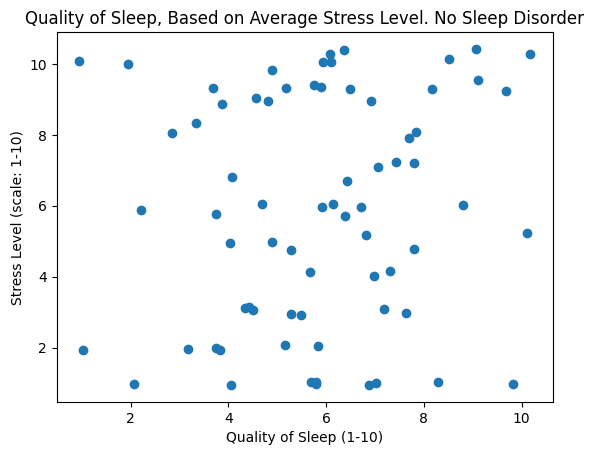

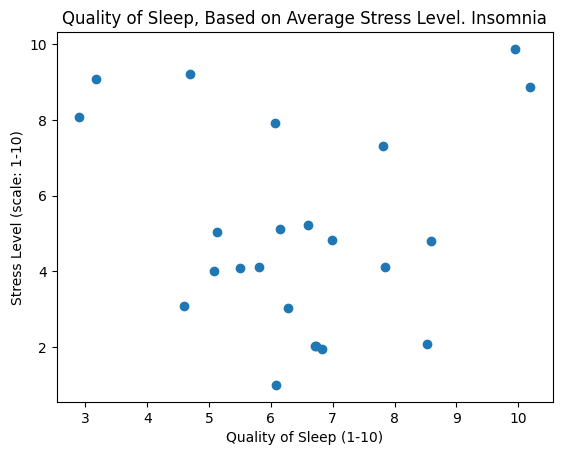

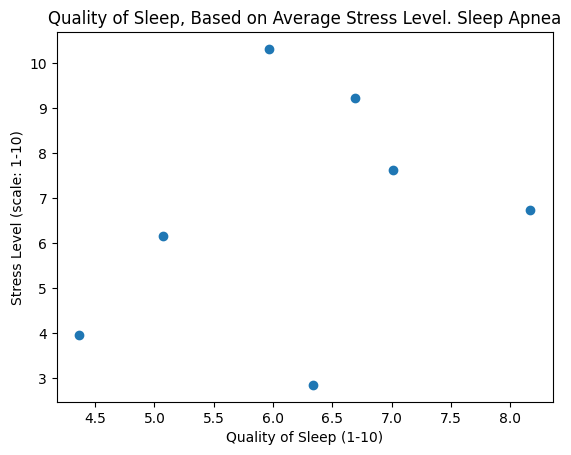

In [42]:
plt.figure()
plt.title("Quality of Sleep, Based on Average Stress Level. No Sleep Disorder")
plt.scatter(no_dis['Quality of Sleep (scale: 1-10)'], no_dis['Stress Level (scale: 1-10)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Stress Level (scale: 1-10)")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Average Stress Level. Insomnia")
plt.scatter(insomnia['Quality of Sleep (scale: 1-10)'], insomnia['Stress Level (scale: 1-10)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Stress Level (scale: 1-10)")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Average Stress Level. Sleep Apnea")
plt.scatter(apnea['Quality of Sleep (scale: 1-10)'], apnea['Stress Level (scale: 1-10)'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Stress Level (scale: 1-10)")
plt.show()

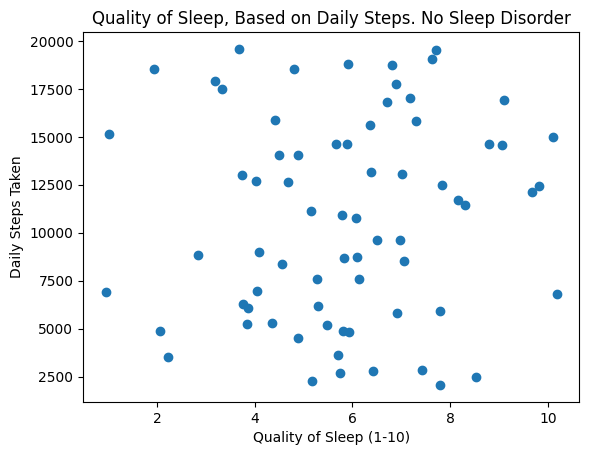

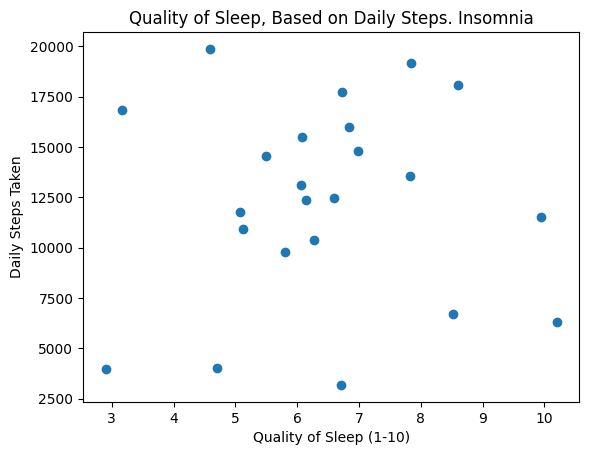

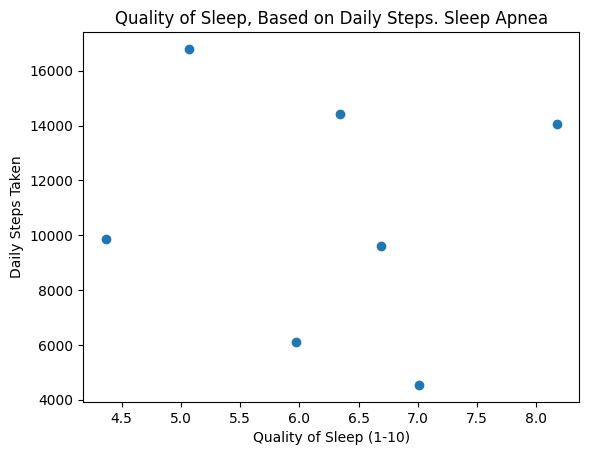

In [43]:
plt.figure()
plt.title("Quality of Sleep, Based on Daily Steps. No Sleep Disorder")
plt.scatter(no_dis['Quality of Sleep (scale: 1-10)'], no_dis['Daily Steps'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Daily Steps Taken")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Daily Steps. Insomnia")
plt.scatter(insomnia['Quality of Sleep (scale: 1-10)'], insomnia['Daily Steps'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Daily Steps Taken")
plt.show()

plt.figure()
plt.title("Quality of Sleep, Based on Daily Steps. Sleep Apnea")
plt.scatter(apnea['Quality of Sleep (scale: 1-10)'], apnea['Daily Steps'])
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Daily Steps Taken")
plt.show()